In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rel = pd.read_csv('./times.release.log', 
                  names='nodes edges parse load search'.split(),
                  skiprows=3)

In [4]:
dbg = pd.read_csv('./times.debug.log', 
                  names='nodes edges parse load search'.split(),
                  skiprows=3)

In [5]:
rel.groupby(['nodes', 'edges']).mean()

,,parse,load,search
nodes,edges,,,
4,2,10590.858000,2.969000,2.739000
5,4,10734.941000,3.021000,6.123000
7,9,10657.935936,4.089089,5.105105
65536,32768,11337.356000,3725.783000,7613.290000


In [6]:
dbg.groupby(['nodes', 'edges']).mean()

,,parse,load,search
nodes,edges,,,
4,2,10662.205000,23.053000,24.872000
5,4,10659.183000,28.249000,34.067000
7,9,10738.314314,40.232232,42.441441
65536,32768,44829.232000,79491.363000,130791.197000


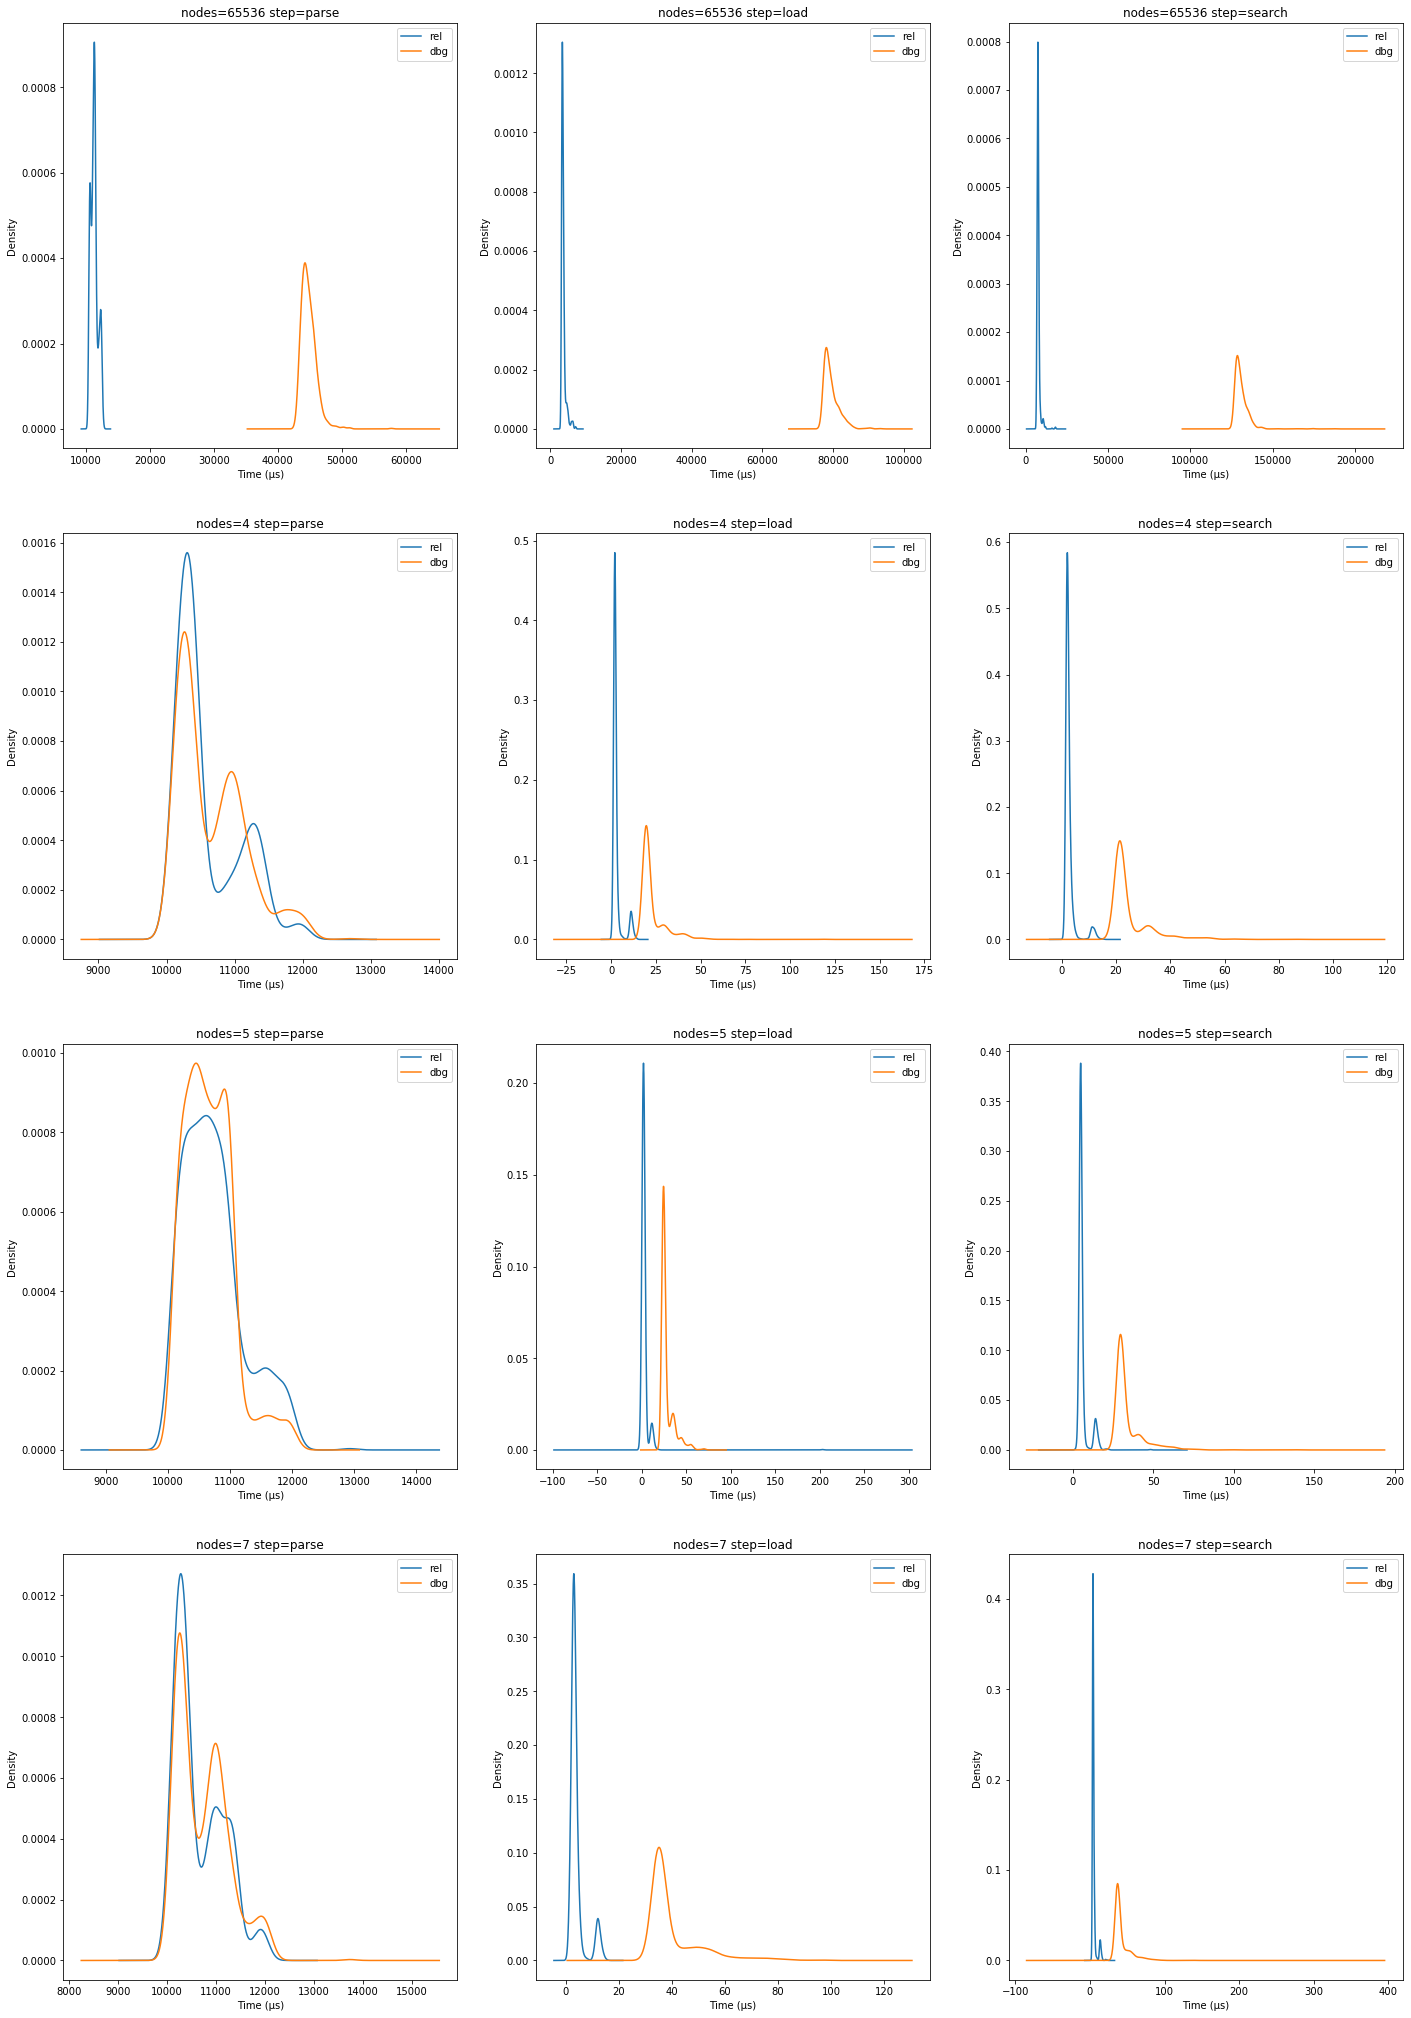

In [7]:
nodes = set(sorted(set(rel.nodes)))
steps = ['parse', 'load', 'search']

fig,axes = plt.subplots(nrows=len(nodes), ncols=len(steps), figsize=(24,36))
for i, step in enumerate(steps):
    for j, n in enumerate(nodes):
        ax = axes[j, i]
        ax.set_title(f'nodes={n} step={step}')
        rel[rel.nodes == n][step].plot.kde(ax=ax, label='rel')
        dbg[dbg.nodes == n][step].plot.kde(ax=ax, label='dbg')
        ax.legend()
        ax.set_xlabel('Time (μs)')